In [2]:
import tensorflow as tf
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

## Input data for target city / cities through API

In [ ]:
'''
def historical():
    cities = pd.read_csv("extracted_data.csv")
    historical_data_by_city = []
    url = "https://archive-api.open-meteo.com/v1/archive"

    for index, row in cities_df.iterrows():
        city_name = row['city']
        latitude = row['lat']
        longitude = row['lng']


        params = {
            "latitude": latitude,
            "longitude": longitude,
            "start_date": "1941-01-01",
            "end_date": "2020-12-31",
            "daily": "temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,windspeed_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration",
            "timezone": "auto"
        }


        response = requests.get(url, params=params)

        # Assuming the response is in JSON format
        historical_data = response.json()

        # Extract relevant data from the response
        daily_data = historical_data['daily']
        elevation = historical_data['elevation']

        # Create a DataFrame from the extracted data
        historical_daily_df = pd.DataFrame(daily_data)
        historical_daily_df.time = pd.to_datetime(historical_daily_df.time)
        historical_daily_df = historical_daily_df.set_index('time')


        # Add city name, elevation, and other info
        historical_daily_df['city'] = city_name
        historical_daily_df['lat'] = latitude
        historical_daily_df['lon'] = longitude
        historical_daily_df['elev'] = elevation

        # Append the DataFrame to the list
        historical_data_by_city.append(historical_daily_df)



    # Concatenate all DataFrames in the list into a single DataFrame
    final_dataframe = pd.concat(historical_data_by_city, ignore_index=False)
    return final_dataframe
final_dataframe_df = historical()
'''


# Input data for target cities used for model training from CSV

In [25]:
# if want to use the historical data csv (Final_project_data/historical_full.csv)
cities_df = pd.read_csv("/content/drive/MyDrive/Final_pro_upload/For_upload/Final_data_files/cities_data_cls_ele.csv")
data_df = pd.read_csv("/content/drive/MyDrive/Final_pro_upload/For_upload/historical.csv")

In [26]:
import pandas as pd

# We have a DataFrame named 'climate_data' containing data for
# all cities with a 'date' column and a 'city' column

# Determine the length (number of rows) of data for the city with shortest duration (Lima)
lima_length = len(data_df[data_df['city'] == 'Lima'])

# Slice the data for all other cities to match the length of Lima's data
data_df = data_df.groupby('city').apply(lambda x: x.iloc[:lima_length]).reset_index(drop=True)

# Now, 'climate_data' contains data for all cities with the same length as Lima's data



## If you have cities data and you want to add climate class and elevation to it


In [27]:
# adding Koeppen-Geiger Climate class information (cls) as a column to city data
'''
def K_Geiger_class(df):
    import pandas as pd
    from scipy.spatial.distance import cdist
    from scipy.spatial import cKDTree

    # Load data from Koeppen-Geiger-ASCII.txt
    koeppen_data = []
    with open("Koeppen-Geiger-ASCII.txt", "r") as file:
        next(file)  # Skip the header line
        for line in file:
            lat, lon, cls = line.strip().split()
            koeppen_data.append((float(lat), float(lon), cls))

    koeppen_df = pd.DataFrame(koeppen_data, columns=["Lat", "Lon", "Cls"])
    kdtree = cKDTree(koeppen_df[["Lat", "Lon"]])

    # Assuming final_dataframe_df is your DataFrame with latitude and longitude columns
    lat_lon_pairs = cities[["lat", "lng"]].values
    distances, indices = kdtree.query(lat_lon_pairs)

    # Assign the Cls values to the "Cls" column in final_dataframe_df
    cities["Cls"] = koeppen_df.loc[indices, "Cls"].values

    # Assuming final_dataframe_df is your DataFrame with latitude column
    cities["Hemi"] = cities["lat"].apply(lambda lat: "N" if lat >= 0 else "S")
    return cities

cities_df = K_Geiger_class(cities)
'''

'\ndef K_Geiger_class(df):\n    import pandas as pd\n    from scipy.spatial.distance import cdist\n    from scipy.spatial import cKDTree\n\n    # Load data from Koeppen-Geiger-ASCII.txt\n    koeppen_data = []\n    with open("Koeppen-Geiger-ASCII.txt", "r") as file:\n        next(file)  # Skip the header line\n        for line in file:\n            lat, lon, cls = line.strip().split()\n            koeppen_data.append((float(lat), float(lon), cls))\n\n    koeppen_df = pd.DataFrame(koeppen_data, columns=["Lat", "Lon", "Cls"])\n    kdtree = cKDTree(koeppen_df[["Lat", "Lon"]])\n\n    # Assuming final_dataframe_df is your DataFrame with latitude and longitude columns\n    lat_lon_pairs = cities[["lat", "lng"]].values\n    distances, indices = kdtree.query(lat_lon_pairs)\n\n    # Assign the Cls values to the "Cls" column in final_dataframe_df\n    cities["Cls"] = koeppen_df.loc[indices, "Cls"].values\n\n    # Assuming final_dataframe_df is your DataFrame with latitude column\n    cities["Hemi

In [ ]:
# adding elevation information (elevation) as a column to city data
'''
def elevation(df):
    import pandas as pd
    import requests


    # Initialize an empty list to store elevation data
    elevations = []

    # Loop through cities and fetch elevation data
    for index, row in cities_df.iterrows():
        lat = row['lat']
        lon = row['lng']

        # Construct the OpenTopoData API URL
        api_url = f"https://api.opentopodata.org/v1/srtm90m?locations={lat},{lon}"

        try:
            # Send a request to the API and retrieve elevation data
            response = requests.get(api_url)
            elevation_data = response.json()
            elevation = elevation_data['results'][0]['elevation']
        except Exception as e:
            print(f"Error fetching elevation for {row['city']}: {str(e)}")
            elevation = None

        # Append elevation information to the 'elevations' list
        elevations.append(elevation)

    # Add the 'elevation' column to the 'cities_df' DataFrame
    cities_df['elevation'] = elevations
    return cities_df

cities_df = elevation(cities_df)
'''

In [28]:
# Filter out rows with NaN values in both 'city' and 'population' columns
cities_df_clean = cities_df.copy()
cities_df_clean = cities_df.dropna(subset=['city', 'population'])

# For each unique key, select the row with the highest population
cities_data = cities_df_clean.loc[cities_df_clean.groupby('city')['population'].idxmax()]

# Display the modified right DataFrame
print("Modified Right DataFrame (with highest population rows only):")
cities_data



Modified Right DataFrame (with highest population rows only):


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,Cls,Hemi,elevation
0,A Coruña,A Coruna,43.3667,-8.3833,Spain,ES,ESP,Galicia,minor,245468.0,1724417375,Csb,N,0.0
1,A Yun Pa,A Yun Pa,13.3939,108.4408,Vietnam,VN,VNM,Gia Lai,minor,53720.0,1704945771,Aw,N,167.0
2,Aabenraa,Aabenraa,55.0444,9.4181,Denmark,DK,DNK,Syddanmark,minor,16401.0,1208000017,Cfb,N,18.0
3,Aachen,Aachen,50.7756,6.0836,Germany,DE,DEU,North Rhine-Westphalia,minor,249070.0,1276805572,Cfb,N,178.0
4,Aadorf,Aadorf,47.4939,8.8975,Switzerland,CH,CHE,Thurgau,NaN,9036.0,1756022542,Cfb,N,519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41053,’Tlat Bni Oukil,'Tlat Bni Oukil,32.5770,-6.8400,Morocco,MA,MAR,Béni Mellal-Khénifra,NaN,14960.0,1504789319,Csa,N,468.0
41054,’s-Gravendeel,'s-Gravendeel,51.7833,4.6167,Netherlands,NL,NLD,Zuid-Holland,NaN,9000.0,1528706910,Cfb,N,-2.0
41055,’s-Gravenzande,'s-Gravenzande,52.0000,4.1667,Netherlands,NL,NLD,Zuid-Holland,NaN,22190.0,1528221207,Cfb,N,0.0
41056,’s-Heerenberg,'s-Heerenberg,51.8764,6.2458,Netherlands,NL,NLD,Gelderland,NaN,8635.0,1528329380,Cfb,N,21.0


In [29]:
# clean word cities data for processing
cities = cities_data.drop(columns=['city_ascii', 'country', 'iso2', 'iso3', 'admin_name', 'capital', 'population', 'id'])


In [30]:
cities

,city,lat,lng,Cls,Hemi,elevation
0,A Coruña,43.3667,-8.3833,Csb,N,0.0
1,A Yun Pa,13.3939,108.4408,Aw,N,167.0
2,Aabenraa,55.0444,9.4181,Cfb,N,18.0
3,Aachen,50.7756,6.0836,Cfb,N,178.0
4,Aadorf,47.4939,8.8975,Cfb,N,519.0
...,...,...,...,...,...,...
41053,’Tlat Bni Oukil,32.5770,-6.8400,Csa,N,468.0
41054,’s-Gravendeel,51.7833,4.6167,Cfb,N,-2.0
41055,’s-Gravenzande,52.0000,4.1667,Cfb,N,0.0
41056,’s-Heerenberg,51.8764,6.2458,Cfb,N,21.0


In [31]:

# Check for and display duplicate keys in the right DataFrame
duplicate_keys = cities[cities.duplicated(subset=['city'], keep=False)]
print(duplicate_keys)

Empty DataFrame
Columns: [city, lat, lng, Cls, Hemi, elevation]
Index: []


## merge cities and historical climate dfs

In [32]:
# We have DataFrames 'data' and 'cities_df_clean'

# Merge the two DataFrames based on the 'city' column
combined_data = pd.merge(data_df, cities, on='city', how='left')

In [33]:
combined_data

,city,date,w_code,tmp,wind,red,pcp,lat,lng,Cls,Hemi,elevation
0,Abidjan,1940-01-01,63.0,24.7,8.4,0.00,0.0,5.3167,-4.0333,Aw,N,13.0
1,Abidjan,1940-01-02,63.0,24.7,8.9,17.14,13.2,5.3167,-4.0333,Aw,N,13.0
2,Abidjan,1940-01-03,63.0,24.2,6.8,16.07,8.3,5.3167,-4.0333,Aw,N,13.0
3,Abidjan,1940-01-04,63.0,24.4,10.0,15.13,7.6,5.3167,-4.0333,Aw,N,13.0
4,Abidjan,1940-01-05,63.0,24.8,8.7,16.33,12.6,5.3167,-4.0333,Aw,N,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1109315,Toronto,2015-12-01,51.0,5.2,21.0,1.22,0.6,43.7417,-79.3733,Dfb,N,149.0
1109316,Toronto,2015-12-02,3.0,4.5,12.8,5.68,0.0,43.7417,-79.3733,Dfb,N,149.0
1109317,Toronto,2015-12-03,3.0,3.3,24.2,5.44,0.0,43.7417,-79.3733,Dfb,N,149.0
1109318,Toronto,2015-12-04,3.0,4.1,18.8,4.69,0.0,43.7417,-79.3733,Dfb,N,149.0


In [34]:
# Check for NaN values in each column and count them
nan_count = combined_data.isna().sum()

# You can also check if there are any NaN values in any column
has_nan = nan_count.any()

# Print the count of NaN values in each column
print("NaN Count in Each Column:")
print(nan_count)

# Check if there are any NaN values in any column
if has_nan:
    print("There are NaN values in one or more columns.")
else:
    print("There are no NaN values in any column.")


NaN Count in Each Column:
city             0
date             0
w_code           0
tmp              0
wind             0
red              0
pcp              0
lat              0
lng              0
Cls              0
Hemi             0
elevation    27733
dtype: int64
There are NaN values in one or more columns.


In [35]:
# Replace NaN values in each column with the median of the last 30 days data in that column
# for climate variables and length of a city data for others
combined_data = combined_data.fillna(combined_data.rolling(window=300000, min_periods=1).median())
#combined_data['elevation'] = combined_data['elevation'].fillna(combined_data['elevation'].median())
data = combined_data.copy()

<ipython-input-35-843704340eee>:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Cls', 'Hemi', 'city', 'date'], dtype='object')
  combined_data = combined_data.fillna(combined_data.rolling(window=300000, min_periods=1).median())


## Save historical data withe all required variables

In [ ]:
'''
from pathlib import Path
#filepath = Path('fill your file path and name here')
filepath = Path("/content/drive/MyDrive/Final_pro_upload/For_upload/Final_data_files/data_allveriables.csv")
filepath.parent.mkdir(parents=True, exist_ok=True)
data.to_csv(filepath, index=False)

'''

## Load historical data (if want to use the given data "hist.csv")

In [ ]:
'''
data = pd.read_csv("your file path")
'''

'\ndata = pd.read_csv("historical_all_ver.csv")\n'

## Data preprocessing (Historical / Reference) (Historical / Reference) - One hot encoding and scaling

### One hot encoding for climate class (Cls) and hemisphare (Hemi)

In [36]:
# Apply one-hot encoding to the "Cls" column
cls_encoded = pd.get_dummies(data["Cls"], prefix="Cls")

# Apply one-hot encoding to the "Hemisphere" column
hemisphere_encoded = pd.get_dummies(data["Hemi"], prefix="Hemi")

# Concatenate the encoded columns back to the original DataFrame
data_encoded = pd.concat([data, cls_encoded, hemisphere_encoded], axis=1)

# Drop the original "Cls" and "Hemisphere" columns
data_encoded = data_encoded.drop(["Cls", "Hemi", "lat"], axis=1)

### Scaling selcted data

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Columns to be scaled
columns_to_scale = ['lng', 'elevation']

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 2))

# Apply the MinMaxScaler to the absolute values of the selected columns
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale].abs())



### Encoding time variables

In [38]:
#-----------------------------------------
df_time = data_encoded.copy()


# Assuming you have a DataFrame named 'df_time' and a column 'date' containing dates and times
df_time['date'] = pd.to_datetime(df_time['date'])  # Convert 'date' column to Timestamp objects

#------------------------------------------
# date and time variable scaling
df_time['Seconds'] = df_time['date'].map(pd.Timestamp.timestamp)

day = 60*60*24
year = 365.2425*day

df_time['Day_sin'] = np.sin(df_time['Seconds'] * (2 * np.pi / day))
df_time['Day_cos'] = np.cos(df_time['Seconds'] * (2 * np.pi / day))
df_time['Year_sin'] = np.sin(df_time['Seconds'] * (2 * np.pi / year))
df_time['Year_cos'] = np.cos(df_time['Seconds'] * (2 * np.pi / year))

# Drop the specified columns
df_time = df_time.drop(columns=['Seconds', 'Day_cos'])

# Copy the modified DataFrame to 'df'
df = df_time.copy()
df = df.set_index(['city', 'date'])
df = df.drop(["w_code"], axis=1)

In [39]:
df

tmp  wind    red   pcp       lng  elevation  Cls_Af  \
city    date                                                               
Abidjan 1940-01-01  24.7   8.4   0.00   0.0  0.051089   0.009401       0   
        1940-01-02  24.7   8.9  17.14  13.2  0.051089   0.009401       0   
        1940-01-03  24.2   6.8  16.07   8.3  0.051089   0.009401       0   
        1940-01-04  24.4  10.0  15.13   7.6  0.051089   0.009401       0   
        1940-01-05  24.8   8.7  16.33  12.6  0.051089   0.009401       0   
...                  ...   ...    ...   ...       ...        ...     ...   
Toronto 2015-12-01   5.2  21.0   1.22   0.6  1.036566   0.115942       0   
        2015-12-02   4.5  12.8   5.68   0.0  1.036566   0.115942       0   
        2015-12-03   3.3  24.2   5.44   0.0  1.036566   0.115942       0   
        2015-12-04   4.1  18.8   4.69   0.0  1.036566   0.115942       0   
        2015-12-05   3.2  11.5   7.29   0.0  1.036566   0.115942       0   

                    Cls_Am  Cls_Aw  Cls_BSh  ...  Cls_Csb  Cls_Cwb  Cls_Dfa  \
city    date                                 ...                              
Abidjan 1940-01-01       0       1        0  ...        0        0        0   
        1940-01-02       0       1        0  ...        0        0        0   
        1940-01-03       0       1        0  ...        0        0        0   
        1940-01-04       0       1        0  ...        0        0        0   
        1940-01-05       0       1        0  ...        0        0        0   
...                    ...     ...      ...  ...      ...      ...      ...   
Toronto 2015-12-01       0       0        0  ...        0        0        0   
        2015-12-02       0       0        0  ...        0        0        0   
        2015-12-03       0       0        0  ...        0        0        0   
        2015-12-04       0       0        0  ...        0        0        0   
        2015-12-05       0       0        0  ...        0        0        0   

                    Cls_Dfb  Cls_Dwa  Hemi_N  Hemi_S       Day_sin  Year_sin  \
city    date                                                                   
Abidjan 1940-01-01        0        0       1       0  1.163374e-12 -0.012472   
        1940-01-02        0        0       1       0  5.461913e-12  0.004731   
        1940-01-03        0        0       1       0  9.760452e-12  0.021932   
        1940-01-04        0        0       1       0 -4.929249e-13  0.039126   
        1940-01-05        0        0       1       0  3.805614e-12  0.056309   
...                     ...      ...     ...     ...           ...       ...   
Toronto 2015-12-01        1        0       1       0 -3.695351e-12 -0.510660   
        2015-12-02        1        0       1       0  6.031880e-13 -0.495795   
        2015-12-03        1        0       1       0 -9.650189e-12 -0.480783   
        2015-12-04        1        0       1       0 -5.351650e-12 -0.465628   
        2015-12-05        1        0       1       0 -1.053111e-12 -0.450336   

                    Year_cos  
city    date                  
Abidjan 1940-01-01  0.999922  
        1940-01-02  0.999989  
        1940-01-03  0.999759  
        1940-01-04  0.999234  
        1940-01-05  0.998413  
...                      ...  
Toronto 2015-12-01  0.859783  
        2015-12-02  0.868440  
        2015-12-03  0.876840  
        2015-12-04  0.884981  
        2015-12-05  0.892859  

[1109320 rows x 24 columns]

## x, y data split and scaling/preprocessing remaining variables

In [ ]:
# X, y data prep

def df_to_X_y(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][3]]
    y.append(label)
  return np.array(X), np.array(y)
X, y = df_to_X_y(df)

#---------------------------------
# train, test and validation data split

X_train, y_train = X[:600000], y[:600000]
X_val, y_val = X[800000:1000000], y[600000:1000000]
X_test, y_test = X[1000000:], y[1000000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


#---------------------------------------------
# normalization and capturing noise, seasonality and extreams

temp_training_mean = np.mean(X_train[:, :, 0])
temp_training_std = np.std(X_train[:, :, 0])
p_training_mean = np.mean(X_train[:, :, 3])
p_training_std = np.std(X_train[:, :, 3])

wind_training_mean = np.mean(X_train[:, :, 1])
wind_training_std = np.std(X_train[:, :, 1])
red_training_mean = np.mean(X_train[:, :, 2])
red_training_std = np.std(X_train[:, :, 2])


def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
    X[:, :, 1] = (X[:, :, 3] - p_training_mean) / p_training_std
    X[:, :, 2] = (X[:, :, 1] - wind_training_mean) / wind_training_std
    X[:, :, 3] = (X[:, :, 2] - red_training_mean) / red_training_std


def preprocess_output(y):
    y[:, 0] = (y[:, 0] - temp_training_mean) / temp_training_std
    y[:, 1] = (y[:, 1] - p_training_mean) / p_training_std

#------------------------------
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)



#--------------------------------
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

##  Model

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

# Define the model
inputs = Input(shape=(7, 24))
x = LSTM(32, return_sequences=True)(inputs)
x = LSTM(64)(x)
x = Dense(32, activation=tf.nn.relu)(x)  # Use tf.nn.relu for ReLU activation
outputs = Dense(2, activation='linear')(x)  # Linear activation is fine as it is

model = Model(inputs=inputs, outputs=outputs)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss=MeanSquaredError(), optimizer=optimizer, metrics=[RootMeanSquaredError()])

# Print model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 24)]           0         
                                                                 
 lstm (LSTM)                 (None, 7, 32)             7296      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 34274 (133.88 KB)
Trainable params: 34274 (133.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model training

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the ModelCheckpoint callback
cp = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=8, verbose=1)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=7, callbacks=[cp])

# Load the best model
best_model = tf.keras.models.load_model('best_model.h5')

# Evaluate the best model
test_loss = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss[0]}, Test RMSE: {test_loss[1]}')

Epoch 1/7
25000/25000 [==============================] - ETA: 0s - loss: 0.3543 - root_mean_squared_error: 0.5952
Epoch 1: val_loss improved from inf to 0.56964, saving model to best_model.h5
25000/25000 [==============================] - 284s 11ms/step - loss: 0.3543 - root_mean_squared_error: 0.5952 - val_loss: 0.5696 - val_root_mean_squared_error: 0.7547
Epoch 2/7
   15/25000 [..............................] - ETA: 3:11 - loss: 0.5553 - root_mean_squared_error: 0.7452

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24999/25000 [============================>.] - ETA: 0s - loss: 0.3442 - root_mean_squared_error: 0.5867
Epoch 2: val_loss did not improve from 0.56964
25000/25000 [==============================] - 267s 11ms/step - loss: 0.3442 - root_mean_squared_error: 0.5867 - val_loss: 0.5751 - val_root_mean_squared_error: 0.7584
Epoch 3/7
24998/25000 [============================>.] - ETA: 0s - loss: 0.3417 - root_mean_squared_error: 0.5845
Epoch 3: val_loss did not improve from 0.56964
25000/25000 [==============================] - 252s 10ms/step - loss: 0.3417 - root_mean_squared_error: 0.5845 - val_loss: 0.5707 - val_root_mean_squared_error: 0.7555
Epoch 4/7
24997/25000 [============================>.] - ETA: 0s - loss: 0.3405 - root_mean_squared_error: 0.5835
Epoch 4: val_loss improved from 0.56964 to 0.56907, saving model to best_model.h5
25000/25000 [==============================] - 271s 11ms/step - loss: 0.3405 - root_mean_squared_error: 0.5835 - val_loss: 0.5691 - val_root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/utils/generic_utils.py:238: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: ignored

In [ ]:
# Specify the desired file path and name
model_filename = 'my_trained_model.h5'

# Save the model to the specified file
best_model.save(f'/content/drive/MyDrive/Final_pro_upload/For_upload/best_model/{model_filename}')

print(f"Model saved to {model_filename}")


Model saved to my_trained_model.h5


In [44]:
from tensorflow.keras.models import load_model
# Define the path to the saved model directory
# Define the filename of the saved model
#model_filename = 'my_trained_model.h5'

# Load the saved model
best_model = load_model(f'/content/drive/MyDrive/Final_pro_upload/For_upload/Final_data_files/best_model.h5')




In [112]:
# Make predictions on the validation set
predicted_values = best_model.predict(X)

34667/34667 [==============================] - 144s 4ms/step


In [113]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std) + temp_training_mean
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std) + p_training_mean
  return arr

# Extract temperature and precipitation predictions

predicted_precipitation, predicted_temperature = postprocess_p(predicted_values[:, 1]), postprocess_temp(predicted_values[:, 0])

## Reference data copies oreperation for trend and variability corrections

In [114]:
reference = df.copy()
reference = reference.rename(columns={"date": "ref_time", "tmp": "ref_tmp", "pcp": "ref_pcp"})
# Set "ref_time" and "city" as the index
#reference.set_index(['city', 'ref_time'], inplace=True)

In [ ]:
reference

In [115]:


# Keep only "ref_tmp" and "ref_pcp" columns
ref_data = reference[['ref_tmp', 'ref_pcp']]

# Drop the first 7 rows from the multi-index DataFrame
ref_data = ref_data.iloc[7:]

#Reset the index to maintain 'ref_time' and 'city' as columns
#ref_data.reset_index(inplace=True)


In [116]:
#ref_data.head(10)
#ref_data['month'] = pd.to_datetime(ref_data.index['date']).month
ref_data['month'] = pd.to_datetime(ref_data.index.get_level_values('date')).month


In [ ]:
ref_data

In [117]:
# create "ref_tmp_pcp" numpy array for adjustments
ref_hist_temp = np.array(ref_data.iloc[0:, 0]).copy()
ref_hist_pcp = np.array(ref_data.iloc[0:, 1]).copy()
ref_tmp_pcp = np.column_stack((ref_hist_temp, ref_hist_pcp))

In [118]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

def adjust_temperature(predicted_temperature, ref_data, extreme_weight_t=0.01, trend_weight_t=0, monthly_weight_t=0.01):
    adjusted_temperature = []

    # Group the reference data by city
    grouped = ref_data.groupby('city')

    for city, city_data in grouped:
        # Calculate historical variability and extreme thresholds for this city
        city_temperature_std = np.std(city_data['ref_tmp'])
        temperature_threshold = np.mean(city_data['ref_tmp']) + 2.5 * city_temperature_std

        # Generate binary extreme indicators based on thresholds
        temperature_extreme_indicator = np.where(city_data['ref_tmp'] > temperature_threshold, 1, 0)

        # Generate extreme components based on the binary indicators
        temperature_extreme_component = temperature_extreme_indicator * np.random.uniform(1.5, 2.5, len(city_data))

        # Calculate the linear trend component for temperature based on historical data
        start_temperature = city_data['ref_tmp'].iloc[0]
        end_temperature = city_data['ref_tmp'].iloc[-1]
        trend_temperature = np.linspace(start_temperature, end_temperature, len(city_data))
        temperature_trend_component = trend_temperature - city_data['ref_tmp']

        # Calculate the monthly variation component for temperature based on historical data
        monthly_mean_temperature = city_data.groupby(['city', 'month'])['ref_tmp'].transform('mean')
        temperature_monthly_component = monthly_mean_temperature - city_data['ref_tmp']



        # Extract the predicted temperature for this city
        predicted_temperature_city = predicted_temperature[:len(city_data)]

        # Calculate the combined temperature components
        combined_temperature_components = (
            (extreme_weight_t * temperature_extreme_component) +
            (trend_weight_t * temperature_trend_component) +
            (monthly_weight_t * temperature_monthly_component)
        )

        # Add combined components to predicted values for this city
        adjusted_city_temperature = predicted_temperature_city + combined_temperature_components

        # Append the adjusted temperatures to the result
        adjusted_temperature.extend(adjusted_city_temperature.tolist())

        # Remove used elements from predicted_temperature
        predicted_temperature = predicted_temperature[len(city_data):]

    return np.array(adjusted_temperature)

# temp adjustment usage
adjusted_predicted_temperature = adjust_temperature(predicted_temperature, ref_data)



### adjusted_predicted_pcp

In [119]:
# precipitation correction
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Reset the index of ref_data


def adjust_precipitation(predicted_precipitation,
                         ref_data, extreme_weight_p1=8,
                         extreme_weight_p2=3,
                         extreme_weight_p3=0.6,
                         seasonal_weight_p=0.01):
    # Calculate historical variability and thresholds from reference data
    precipitation_std = np.std(ref_data['ref_pcp'])
    precipitation_threshold1 = np.mean(ref_data['ref_pcp']) + 8 * precipitation_std
    precipitation_threshold2 = np.mean(ref_data['ref_pcp']) + 4 * precipitation_std
    precipitation_threshold3 = np.mean(ref_data['ref_pcp']) + 1.5 * precipitation_std

    # Generate binary extreme indicators based on thresholds
    precipitation_extreme_indicator1 = np.where(ref_data['ref_pcp'] > precipitation_threshold1, 1, 0)
    precipitation_extreme_indicator2 = np.where(ref_data['ref_pcp'] > precipitation_threshold2, 1, 0)
    precipitation_extreme_indicator3 = np.where(ref_data['ref_pcp'] > precipitation_threshold3, 1, 0)

    # Generate extreme components based on the binary indicators
    precipitation_extreme_component1 = precipitation_extreme_indicator1 * np.random.uniform(2, 12, len(ref_data))
    precipitation_extreme_component2 = precipitation_extreme_indicator2 * np.random.uniform(2, 12, len(ref_data))
    precipitation_extreme_component3 = precipitation_extreme_indicator3 * np.random.uniform(2, 12, len(ref_data))

    # Calculate seasonal component for precipitation based on historical data

    monthly_mean_precipitation = ref_data.groupby(['city', 'month'])['ref_pcp'].transform('mean')
    precipitation_seasonal_component = monthly_mean_precipitation - ref_data['ref_pcp']

    # Calculate adjusted precipitation
    adjusted_precipitation = predicted_precipitation + (extreme_weight_p1 * precipitation_extreme_component1) + (extreme_weight_p2 * precipitation_extreme_component2) + (extreme_weight_p3 * precipitation_extreme_component3) + (seasonal_weight_p * precipitation_seasonal_component.values)

    return adjusted_precipitation



# Example usage
adjusted_predicted_precipitation = adjust_precipitation(predicted_precipitation, ref_data)



In [120]:


#  Series for predictions and actuals
p_preds, temp_preds = adjusted_predicted_precipitation.flatten(), adjusted_predicted_temperature.flatten()
p_actuals, temp_actuals = ref_hist_pcp.flatten(), ref_hist_temp.flatten()

# Create the DataFrame
final_df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                               'Temperature Actuals': temp_actuals,
                               'Precipitation Predictions': p_preds,
                               'Precipitation Actuals': p_actuals
                              })

# Adjust the 'Precipitation Predictions' and 'Precipitation Actuals' columns as needed
final_df['Precipitation Predictions'] = np.where(final_df['Precipitation Predictions'] < 0.6, 0, final_df['Precipitation Predictions'])
final_df['Precipitation Actuals'] = np.where(final_df['Precipitation Actuals'] < 0, 0, final_df['Precipitation Actuals'])
final_df

,Temperature Predictions,Temperature Actuals,Precipitation Predictions,Precipitation Actuals
0,25.608322,25.3,4.009389,3.1
1,25.509226,24.4,11.601940,13.3
2,25.100145,24.6,8.085703,1.0
3,25.125951,23.9,3.632681,5.3
4,24.704392,24.0,5.973408,7.5
...,...,...,...,...
1109308,3.137950,5.2,0.849157,0.6
1109309,6.187994,4.5,2.818768,0.0
1109310,4.663222,3.3,0.694786,0.0
1109311,3.935092,4.1,0.910846,0.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


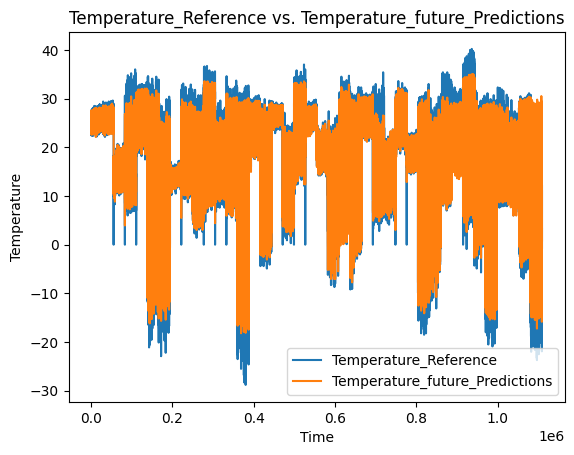

MAE for Temperature: 1.06
R2 Score for Temperature: 0.96
RMSE for Temperature: 1.58
Mean Percent Error for Temperature: 0.40%


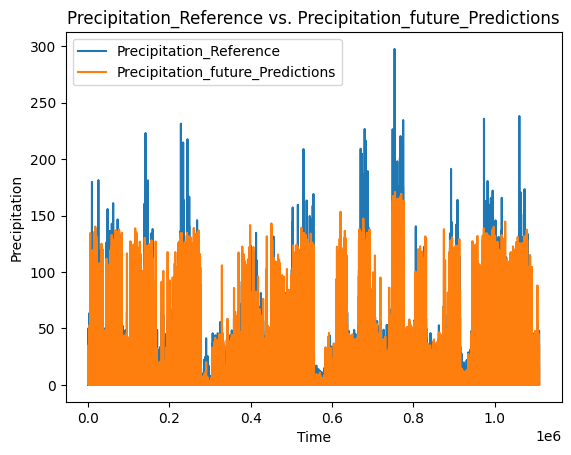

MAE for Precipitation: 2.00
R2 Score for Precipitation: 0.62
RMSE for Precipitation: 3.92
Nash-Sutcliffe Efficiency for Precipitation: 0.62


In [121]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Plot actual vs. predicted temperatures
start, end = 0, 1200000

plt.plot(final_df['Temperature Actuals'][start:end], label='Temperature_Reference')
plt.plot(final_df['Temperature Predictions'][start:end], label='Temperature_future_Predictions')

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature_Reference vs. Temperature_future_Predictions')
plt.legend()

plt.show()

# Calculate accuracy indices for temperature predictions
actual_temps = final_df['Temperature Actuals'][start:end]
predicted_temps = final_df['Temperature Predictions'][start:end]

mae_temp = mean_absolute_error(actual_temps, predicted_temps)
r2_temp = r2_score(actual_temps, predicted_temps)
rmse_temp = np.sqrt(mean_squared_error(actual_temps, predicted_temps))
mean_percent_error_temp = np.mean(np.where(actual_temps != 0, (actual_temps - predicted_temps) / actual_temps, 0)) * 100




print(f"MAE for Temperature: {mae_temp:.2f}")
print(f"R2 Score for Temperature: {r2_temp:.2f}")
print(f"RMSE for Temperature: {rmse_temp:.2f}")
print(f"Mean Percent Error for Temperature: {mean_percent_error_temp:.2f}%")

# Plot actual vs. predicted precipitations
plt.plot(final_df['Precipitation Actuals'][start:end], label='Precipitation_Reference')
plt.plot(final_df['Precipitation Predictions'][start:end], label='Precipitation_future_Predictions')

plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Precipitation_Reference vs. Precipitation_future_Predictions')
plt.legend()

plt.show()

# Calculate accuracy indices for precipitation predictions
actual_precip = final_df['Precipitation Actuals'][start:end]
predicted_precip = final_df['Precipitation Predictions'][start:end]

mae_precip = mean_absolute_error(actual_precip, predicted_precip)
r2_precip = r2_score(actual_precip, predicted_precip)
rmse_precip = np.sqrt(mean_squared_error(actual_precip, predicted_precip))
nse_precip = 1 - (np.sum((actual_precip - predicted_precip)**2) / np.sum((actual_precip - np.mean(actual_precip))**2))


print(f"MAE for Precipitation: {mae_precip:.2f}")
print(f"R2 Score for Precipitation: {r2_precip:.2f}")
print(f"RMSE for Precipitation: {rmse_precip:.2f}")
print(f"Nash-Sutcliffe Efficiency for Precipitation: {nse_precip:.2f}")

##  Future data copies prep for trend and variability corrections

In [57]:
f_data = data.copy()
f_data = f_data.rename(columns={"time": "f_date", "tmp": "f_tmp", "pcp": "f_pcp"})

In [63]:
 # Extract same temperature and precipitation data to be use for future
f_temp = np.array(f_data.iloc[7:, 0]).copy()
f_pcp = np.array(f_data.iloc[7:, 3]).copy()
f_tmp_pcp = np.column_stack((f_temp, f_pcp))

f_time = data.index[7:].values.copy()
# Create a dictionary to hold the arrays
data_dict_f = {
    'time': f_time,
    'Predicted_temp': f_temp,
    'Predicted_pcp': f_pcp
}

# Create a DataFrame from the dictionary
f_data_df = pd.DataFrame(data_dict_f)

## Model use for future data

## Preparing Future data

In [46]:
df.head(-5)

tmp  wind    red   pcp       lng  elevation  Cls_Af  \
city    date                                                               
Abidjan 1940-01-01  24.7   8.4   0.00   0.0  0.051089   0.009401       0   
        1940-01-02  24.7   8.9  17.14  13.2  0.051089   0.009401       0   
        1940-01-03  24.2   6.8  16.07   8.3  0.051089   0.009401       0   
        1940-01-04  24.4  10.0  15.13   7.6  0.051089   0.009401       0   
        1940-01-05  24.8   8.7  16.33  12.6  0.051089   0.009401       0   
...                  ...   ...    ...   ...       ...        ...     ...   
Toronto 2015-11-26   8.8  25.9   2.84   0.0  1.036566   0.115942       0   
        2015-11-27   9.3  27.5   1.03   5.7  1.036566   0.115942       0   
        2015-11-28   0.8  16.5   7.53   0.4  1.036566   0.115942       0   
        2015-11-29   0.1  11.1   5.87   0.0  1.036566   0.115942       0   
        2015-11-30   1.5  16.1   5.57   0.0  1.036566   0.115942       0   

                    Cls_Am  Cls_Aw  Cls_BSh  ...  Cls_Csb  Cls_Cwb  Cls_Dfa  \
city    date                                 ...                              
Abidjan 1940-01-01       0       1        0  ...        0        0        0   
        1940-01-02       0       1        0  ...        0        0        0   
        1940-01-03       0       1        0  ...        0        0        0   
        1940-01-04       0       1        0  ...        0        0        0   
        1940-01-05       0       1        0  ...        0        0        0   
...                    ...     ...      ...  ...      ...      ...      ...   
Toronto 2015-11-26       0       0        0  ...        0        0        0   
        2015-11-27       0       0        0  ...        0        0        0   
        2015-11-28       0       0        0  ...        0        0        0   
        2015-11-29       0       0        0  ...        0        0        0   
        2015-11-30       0       0        0  ...        0        0        0   

                    Cls_Dfb  Cls_Dwa  Hemi_N  Hemi_S       Day_sin  Year_sin  \
city    date                                                                   
Abidjan 1940-01-01        0        0       1       0  1.163374e-12 -0.012472   
        1940-01-02        0        0       1       0  5.461913e-12  0.004731   
        1940-01-03        0        0       1       0  9.760452e-12  0.021932   
        1940-01-04        0        0       1       0 -4.929249e-13  0.039126   
        1940-01-05        0        0       1       0  3.805614e-12  0.056309   
...                     ...      ...     ...     ...           ...       ...   
Toronto 2015-11-26        1        0       1       0 -1.063613e-11 -0.582634   
        2015-11-27        1        0       1       0 -6.337590e-12 -0.568568   
        2015-11-28        1        0       1       0 -2.039051e-12 -0.554333   
        2015-11-29        1        0       1       0 -1.229243e-11 -0.539933   
        2015-11-30        1        0       1       0 -7.993889e-12 -0.525375   

                    Year_cos  
city    date                  
Abidjan 1940-01-01  0.999922  
        1940-01-02  0.999989  
        1940-01-03  0.999759  
        1940-01-04  0.999234  
        1940-01-05  0.998413  
...                      ...  
Toronto 2015-11-26  0.812734  
        2015-11-27  0.822637  
        2015-11-28  0.832295  
        2015-11-29  0.841708  
        2015-11-30  0.850871  

[1109315 rows x 24 columns]

In [47]:
data_for_fprep = df.copy()
data_for_fprep.reset_index(level='city', inplace=True)


In [48]:
data_for_fprep

,city,tmp,wind,red,pcp,lng,elevation,Cls_Af,Cls_Am,Cls_Aw,...,Cls_Csb,Cls_Cwb,Cls_Dfa,Cls_Dfb,Cls_Dwa,Hemi_N,Hemi_S,Day_sin,Year_sin,Year_cos
date,,,,,,,,,,,,,,,,,,,,,
1940-01-01,Abidjan,24.7,8.4,0.00,0.0,0.051089,0.009401,0,0,1,...,0,0,0,0,0,1,0,1.163374e-12,-0.012472,0.999922
1940-01-02,Abidjan,24.7,8.9,17.14,13.2,0.051089,0.009401,0,0,1,...,0,0,0,0,0,1,0,5.461913e-12,0.004731,0.999989
1940-01-03,Abidjan,24.2,6.8,16.07,8.3,0.051089,0.009401,0,0,1,...,0,0,0,0,0,1,0,9.760452e-12,0.021932,0.999759
1940-01-04,Abidjan,24.4,10.0,15.13,7.6,0.051089,0.009401,0,0,1,...,0,0,0,0,0,1,0,-4.929249e-13,0.039126,0.999234
1940-01-05,Abidjan,24.8,8.7,16.33,12.6,0.051089,0.009401,0,0,1,...,0,0,0,0,0,1,0,3.805614e-12,0.056309,0.998413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,Toronto,5.2,21.0,1.22,0.6,1.036566,0.115942,0,0,0,...,0,0,0,1,0,1,0,-3.695351e-12,-0.510660,0.859783
2015-12-02,Toronto,4.5,12.8,5.68,0.0,1.036566,0.115942,0,0,0,...,0,0,0,1,0,1,0,6.031880e-13,-0.495795,0.868440
2015-12-03,Toronto,3.3,24.2,5.44,0.0,1.036566,0.115942,0,0,0,...,0,0,0,1,0,1,0,-9.650189e-12,-0.480783,0.876840


In [49]:
import pandas as pd

# Create a date range from 2024-01-01 to 2099-12-05 with a 80-year frequency
date_range = pd.date_range(start='2024-01-01', end='2099-12-05', freq='D')

# Calculate the total number of rows in your DataFrame
num_rows = len(data_for_fprep)

# Calculate the index for each row based on modulo operation
index_mod = [i % len(date_range) for i in range(num_rows)]

# Add the "time" column to the DataFrame using the index_mod
data_for_fprep['date'] = date_range[index_mod]
# make city regular column
#data_for_fprep.reset_index(drop=True, inplace=True)

# Reset the index for the DataFrame
data_for_fprep.reset_index(drop=True, inplace=True)
data_for_fprep.set_index(['date', 'city'], inplace=True)
data_for_fprep

,,tmp,wind,red,pcp,lng,elevation,Cls_Af,Cls_Am,Cls_Aw,Cls_BSh,...,Cls_Csb,Cls_Cwb,Cls_Dfa,Cls_Dfb,Cls_Dwa,Hemi_N,Hemi_S,Day_sin,Year_sin,Year_cos
date,city,,,,,,,,,,,,,,,,,,,,,
2024-01-01,Abidjan,24.7,8.4,0.00,0.0,0.051089,0.009401,0,0,1,0,...,0,0,0,0,0,1,0,1.163374e-12,-0.012472,0.999922
2024-01-02,Abidjan,24.7,8.9,17.14,13.2,0.051089,0.009401,0,0,1,0,...,0,0,0,0,0,1,0,5.461913e-12,0.004731,0.999989
2024-01-03,Abidjan,24.2,6.8,16.07,8.3,0.051089,0.009401,0,0,1,0,...,0,0,0,0,0,1,0,9.760452e-12,0.021932,0.999759
2024-01-04,Abidjan,24.4,10.0,15.13,7.6,0.051089,0.009401,0,0,1,0,...,0,0,0,0,0,1,0,-4.929249e-13,0.039126,0.999234
2024-01-05,Abidjan,24.8,8.7,16.33,12.6,0.051089,0.009401,0,0,1,0,...,0,0,0,0,0,1,0,3.805614e-12,0.056309,0.998413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099-12-01,Toronto,5.2,21.0,1.22,0.6,1.036566,0.115942,0,0,0,0,...,0,0,0,1,0,1,0,-3.695351e-12,-0.510660,0.859783
2099-12-02,Toronto,4.5,12.8,5.68,0.0,1.036566,0.115942,0,0,0,0,...,0,0,0,1,0,1,0,6.031880e-13,-0.495795,0.868440
2099-12-03,Toronto,3.3,24.2,5.44,0.0,1.036566,0.115942,0,0,0,0,...,0,0,0,1,0,1,0,-9.650189e-12,-0.480783,0.876840


In [51]:
f_df = data_for_fprep.copy()
#data_for_fprep['Seconds'] = data_for_fprep.index.get_level_values('time').map(pd.Timestamp.timestamp)

In [53]:
def f_df_to_X_y(f_df, window_size=7):
  f_df_as_np = f_df.to_numpy()
  X_f = []
  y_f = []
  for i in range(len(f_df_as_np)-window_size):
    row = [r for r in f_df_as_np[i:i+window_size]]
    X_f.append(row)
    label = [f_df_as_np[i+window_size][0], f_df_as_np[i+window_size][1]]
    y_f.append(label)
  return np.array(X_f), np.array(y_f)

X_f, y_f = f_df_to_X_y(f_df)
#---------------------------------
# future data for trend and seasonality correction


#---------------------------------
# train, test and validation data split

X_f_train, y_f_train = X_f[:600000], y_f[:600000]
X_f_val, y_f_val = X_f[800000:1000000], y_f[600000:1000000]
X_f_test, y_f_test = X_f[1000000:], y_f[1000000:]

X_f_train.shape, y_f_train.shape, X_f_val.shape, y_f_val.shape, X_f_test.shape, y_f_test.shape

((600000, 7, 24),
 (600000, 2),
 (200000, 7, 24),
 (400000, 2),
 (109313, 7, 24),
 (109313, 2))

In [54]:
#---------------------------------------------
# normalization and capturing noise, seasonality and extreams

f_temp_training_mean = np.mean(X_f_train[:, :, 0])
f_temp_training_std = np.std(X_f_train[:, :, 0])
f_p_training_mean = np.mean(X_f_train[:, :, 3])
f_p_training_std = np.std(X_f_train[:, :, 3])

f_wind_training_mean = np.mean(X_f_train[:, :, 1])
f_wind_training_std = np.std(X_f_train[:, :, 1])
f_red_training_mean = np.mean(X_f_train[:, :, 2])
f_red_training_std = np.std(X_f_train[:, :, 2])


def f_preprocess(X_f):
    X_f[:, :, 0] = (X_f[:, :, 0] - f_temp_training_mean) / f_temp_training_std
    X_f[:, :, 1] = (X_f[:, :, 3] - f_p_training_mean) / f_p_training_std
    X_f[:, :, 2] = (X_f[:, :, 1] - f_wind_training_mean) / f_wind_training_std
    X_f[:, :, 3] = (X_f[:, :, 2] - f_red_training_mean) / f_red_training_std

def f_preprocess_output(y_f):
    y_f[:, 0] = (y_f[:, 0] - f_temp_training_mean) / f_temp_training_std
    y_f[:, 1] = (y_f[:, 1] - f_p_training_mean) / f_p_training_std

#------------------------------
f_preprocess(X_f_train)
f_preprocess(X_f_val)
f_preprocess(X_f_test)

#--------------------------------
f_preprocess_output(y_f_train)
f_preprocess_output(y_f_val)
f_preprocess_output(y_f_test)

In [55]:

# Make predictions using the loaded model
future_predicted_values = best_model.predict(X_f)



34667/34667 [==============================] - 143s 4ms/step


In [56]:
future_predicted_values

array([[ 0.882334  ,  0.23834756],
       [ 0.87539166,  0.48186707],
       [ 0.8229587 ,  0.9250924 ],
       ...,
       [-1.7606597 , -0.3204016 ],
       [-1.8616519 , -0.28485322],
       [-1.6996229 , -0.2844904 ]], dtype=float32)

In [57]:

def f_postprocess_temp(arr):
  arr = (arr*temp_training_std) + temp_training_mean
  return arr

def f_postprocess_p(arr):
  arr = (arr*p_training_std) + p_training_mean
  return arr

# Extract temperature and precipitation predictions

#predicted_precipitation, predicted_temperature = postprocess_p(predicted_values[:, 1]), postprocess_temp(predicted_values[:, 0])
future_predicted_precipitation = f_postprocess_p(future_predicted_values[:, 1])
future_predicted_temperature =  f_postprocess_temp(future_predicted_values[:, 0])

In [60]:
reference_f = f_df.copy()
reference_f = reference_f.rename(columns={"date": "ref_time", "tmp": "ref_tmp", "pcp": "ref_pcp"})
# Set "ref_time" and "city" as the index
#reference.set_index(['city', 'ref_time'], inplace=True)

In [61]:
reference_f

,,ref_tmp,wind,red,ref_pcp,lng,elevation,Cls_Af,Cls_Am,Cls_Aw,Cls_BSh,...,Cls_Csb,Cls_Cwb,Cls_Dfa,Cls_Dfb,Cls_Dwa,Hemi_N,Hemi_S,Day_sin,Year_sin,Year_cos
date,city,,,,,,,,,,,,,,,,,,,,,
2024-01-01,Abidjan,24.7,8.4,0.00,0.0,0.051089,0.009401,0,0,1,0,...,0,0,0,0,0,1,0,1.163374e-12,-0.012472,0.999922
2024-01-02,Abidjan,24.7,8.9,17.14,13.2,0.051089,0.009401,0,0,1,0,...,0,0,0,0,0,1,0,5.461913e-12,0.004731,0.999989
2024-01-03,Abidjan,24.2,6.8,16.07,8.3,0.051089,0.009401,0,0,1,0,...,0,0,0,0,0,1,0,9.760452e-12,0.021932,0.999759
2024-01-04,Abidjan,24.4,10.0,15.13,7.6,0.051089,0.009401,0,0,1,0,...,0,0,0,0,0,1,0,-4.929249e-13,0.039126,0.999234
2024-01-05,Abidjan,24.8,8.7,16.33,12.6,0.051089,0.009401,0,0,1,0,...,0,0,0,0,0,1,0,3.805614e-12,0.056309,0.998413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099-12-01,Toronto,5.2,21.0,1.22,0.6,1.036566,0.115942,0,0,0,0,...,0,0,0,1,0,1,0,-3.695351e-12,-0.510660,0.859783
2099-12-02,Toronto,4.5,12.8,5.68,0.0,1.036566,0.115942,0,0,0,0,...,0,0,0,1,0,1,0,6.031880e-13,-0.495795,0.868440
2099-12-03,Toronto,3.3,24.2,5.44,0.0,1.036566,0.115942,0,0,0,0,...,0,0,0,1,0,1,0,-9.650189e-12,-0.480783,0.876840


In [63]:


# Keep only "ref_tmp" and "ref_pcp" columns
ref_data_f = reference_f[['ref_tmp', 'ref_pcp']]

# Drop the first 7 rows from the multi-index DataFrame
ref_data_f = ref_data_f.iloc[7:]

#Reset the index to maintain 'ref_time' and 'city' as columns
#ref_data.reset_index(inplace=True)
ref_data_f

,,ref_tmp,ref_pcp
date,city,,
2024-01-08,Abidjan,25.3,3.1
2024-01-09,Abidjan,24.4,13.3
2024-01-10,Abidjan,24.6,1.0
2024-01-11,Abidjan,23.9,5.3
2024-01-12,Abidjan,24.0,7.5
...,...,...,...
2099-12-01,Toronto,5.2,0.6
2099-12-02,Toronto,4.5,0.0
2099-12-03,Toronto,3.3,0.0


In [64]:
#ref_data.head(10)
#ref_data['month'] = pd.to_datetime(ref_data.index['date']).month
ref_data_f['month'] = pd.to_datetime(ref_data_f.index.get_level_values('date')).month


In [65]:
ref_data_f

,,ref_tmp,ref_pcp,month
date,city,,,
2024-01-08,Abidjan,25.3,3.1,1
2024-01-09,Abidjan,24.4,13.3,1
2024-01-10,Abidjan,24.6,1.0,1
2024-01-11,Abidjan,23.9,5.3,1
2024-01-12,Abidjan,24.0,7.5,1
...,...,...,...,...
2099-12-01,Toronto,5.2,0.6,12
2099-12-02,Toronto,4.5,0.0,12
2099-12-03,Toronto,3.3,0.0,12


In [67]:
# create "ref_tmp_pcp" numpy array for adjustments
ref_hist_temp_f = np.array(ref_data_f.iloc[0:, 0]).copy()
ref_hist_pcp_f = np.array(ref_data_f.iloc[0:, 1]).copy()
ref_tmp_pcp_f = np.column_stack((ref_hist_temp_f, ref_hist_pcp_f))

# Temperation adjustments

In [159]:

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

def adjust_temperature(future_predicted_temperature, ref_data_f, extreme_weight_t=1, trend_weight_t=0.1, monthly_weight_t=1):
    adjusted_temperature = []

    # Group the reference data by city
    grouped = ref_data_f.groupby('city')

    for city, city_data in grouped:
        # Calculate historical variability and extreme thresholds for this city
        city_temperature_std = np.std(city_data['ref_tmp'])
        temperature_threshold = np.mean(city_data['ref_tmp']) + 2.5 * city_temperature_std

        # Generate binary extreme indicators based on thresholds
        temperature_extreme_indicator = np.where(city_data['ref_tmp'] > temperature_threshold, 1, 0)

        # Generate extreme components based on the binary indicators
        temperature_extreme_component = temperature_extreme_indicator * np.random.uniform(1.5, 2.5, len(city_data))

        # Calculate the linear trend component for temperature based on historical data
        start_temperature = city_data['ref_tmp'].iloc[0]
        end_temperature = city_data['ref_tmp'].iloc[-1]
        trend_temperature = np.linspace(start_temperature, end_temperature, len(city_data))
        temperature_trend_component = trend_temperature - city_data['ref_tmp']

        # Calculate the monthly variation component for temperature based on historical data
        monthly_mean_temperature = city_data.groupby(['city', 'month'])['ref_tmp'].transform('mean')
        temperature_monthly_component = monthly_mean_temperature - city_data['ref_tmp']



        # Extract the predicted temperature for this city
        predicted_temperature_city = future_predicted_temperature[:len(city_data)]

        # Calculate the combined temperature components
        combined_temperature_components = (
            (extreme_weight_t * temperature_extreme_component) +
            (trend_weight_t * temperature_trend_component) +
            (monthly_weight_t * temperature_monthly_component)
        )

        # Add combined components to predicted values for this city
        adjusted_city_temperature = predicted_temperature_city + combined_temperature_components

        # Append the adjusted temperatures to the result
        adjusted_temperature.extend(adjusted_city_temperature.tolist())

        # Remove used elements from predicted_temperature
        future_predicted_temperature = future_predicted_temperature[len(city_data):]

    return np.array(adjusted_temperature)

# temp adjustment usage
final_future_pred_tmp = adjust_temperature(future_predicted_temperature, ref_data_f)

final_future_pred_tmp

array([26.33328062, 27.27018688, 26.64913745, ...,  0.14492514,
       -1.50752144,  0.72186136])

### adjusted_predicted_pcp

In [141]:
# precipitation correction
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Reset the index of ref_data


def adjust_future_predictions(future_predicted_precipitation,
                         ref_data, extreme_weight_p1=8,
                         extreme_weight_p2=3,
                         extreme_weight_p3=0.6,
                         seasonal_weight_p=0.01):
    # Calculate historical variability and thresholds from reference data
    precipitation_std = np.std(ref_data_f['ref_pcp'])
    precipitation_threshold1 = np.mean(ref_data_f['ref_pcp']) + 8 * precipitation_std
    precipitation_threshold2 = np.mean(ref_data_f['ref_pcp']) + 4 * precipitation_std
    precipitation_threshold3 = np.mean(ref_data_f['ref_pcp']) + 1.5 * precipitation_std

    # Generate binary extreme indicators based on thresholds
    precipitation_extreme_indicator1 = np.where(ref_data_f['ref_pcp'] > precipitation_threshold1, 1, 0)
    precipitation_extreme_indicator2 = np.where(ref_data_f['ref_pcp'] > precipitation_threshold2, 1, 0)
    precipitation_extreme_indicator3 = np.where(ref_data_f['ref_pcp'] > precipitation_threshold3, 1, 0)

    # Generate extreme components based on the binary indicators
    precipitation_extreme_component1 = precipitation_extreme_indicator1 * np.random.uniform(2, 12, len(ref_data))
    precipitation_extreme_component2 = precipitation_extreme_indicator2 * np.random.uniform(2, 12, len(ref_data))
    precipitation_extreme_component3 = precipitation_extreme_indicator3 * np.random.uniform(2, 12, len(ref_data))

    # Calculate seasonal component for precipitation based on historical data

    monthly_mean_precipitation = ref_data_f.groupby(['city', 'month'])['ref_pcp'].transform('mean')
    precipitation_seasonal_component = monthly_mean_precipitation - ref_data_f['ref_pcp']

    # Calculate adjusted precipitation
    adjusted_precipitation = future_predicted_precipitation + (extreme_weight_p1 * precipitation_extreme_component1) + (extreme_weight_p2 * precipitation_extreme_component2) + (extreme_weight_p3 * precipitation_extreme_component3) + (seasonal_weight_p * precipitation_seasonal_component.values)

    return adjusted_precipitation



# usage
final_future_pred_pcp = adjust_future_predictions(future_predicted_precipitation, ref_data_f)



In [160]:
final_future_df = ref_data_f.copy()

# Assign temp_preds to the 'Predicted_temp' column
final_future_df['future_tmp'] = final_future_pred_tmp.round(1)

# Assign p_preds to the 'Predicted_pcp' column
final_future_df['future_pcp'] = final_future_pred_pcp.round(1)

final_future_df = final_future_df.drop(['month'], axis=1)
final_future_df

,,ref_tmp,ref_pcp,future_tmp,future_pcp
date,city,,,,
2024-01-08,Abidjan,25.3,3.1,26.3,4.0
2024-01-09,Abidjan,24.4,13.3,27.3,11.2
2024-01-10,Abidjan,24.6,1.0,26.6,8.2
2024-01-11,Abidjan,23.9,5.3,27.4,3.5
2024-01-12,Abidjan,24.0,7.5,26.9,6.0
...,...,...,...,...,...
2099-12-01,Toronto,5.2,0.6,-3.5,0.7
2099-12-02,Toronto,4.5,0.0,0.0,2.8
2099-12-03,Toronto,3.3,0.0,0.1,0.5


In [151]:
# Replace precipitation values less than 0.5 with 0
final_future_df['future_pcp'] = np.where(final_future_df['future_pcp'] < 0.8, 0, final_future_df['future_pcp'])
final_future_df['ref_pcp'] = np.where(final_future_df['ref_pcp'] < 0.1, 0, final_future_df['ref_pcp'])

In [ ]:
'''
# Specify the path where you want to save the CSV file
csv_file_path = 'your future file path and name.csv'

# Save the DataFrame to a CSV file
final_future_df.to_csv(csv_file_path, index=False)  # Set index=False if you don't want to save the index column
'''

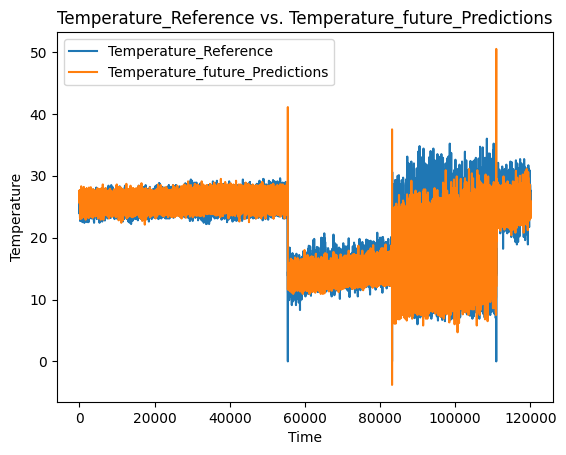

MAE for Temperature: 1.72
R2 Score for Temperature: 0.79
RMSE for Temperature: 2.72
Mean Percent Error for Temperature: 0.29%


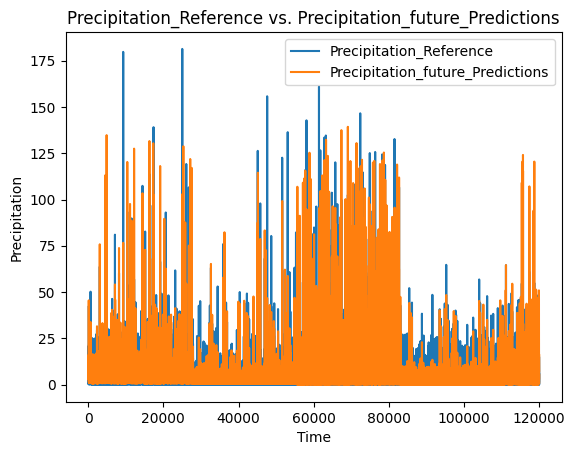

MAE for Precipitation: 2.13
R2 Score for Precipitation: 0.67
RMSE for Precipitation: 3.55
Nash-Sutcliffe Efficiency for Precipitation: 0.67


In [161]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Reset the index of your DataFrame
final_future_df.reset_index(drop=True, inplace=True)

# Plot actual vs. predicted temperatures
start, end = 0, 120000

plt.plot(final_future_df.index[start:end], final_future_df['ref_tmp'][start:end], label='Temperature_Reference')
plt.plot(final_future_df.index[start:end], final_future_df['future_tmp'][start:end], label='Temperature_future_Predictions')


plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature_Reference vs. Temperature_future_Predictions')
plt.legend()

plt.show()

# Calculate accuracy indices for temperature predictions
actual_temps = final_future_df['ref_tmp'][start:end]
predicted_temps = final_future_df['future_tmp'][start:end]

mae_temp = mean_absolute_error(actual_temps, predicted_temps)
r2_temp = r2_score(actual_temps, predicted_temps)
rmse_temp = np.sqrt(mean_squared_error(actual_temps, predicted_temps))
mean_percent_error_temp = np.mean(np.where(actual_temps != 0, (actual_temps - predicted_temps) / actual_temps, 0)) * 100


print(f"MAE for Temperature: {mae_temp:.2f}")
print(f"R2 Score for Temperature: {r2_temp:.2f}")
print(f"RMSE for Temperature: {rmse_temp:.2f}")
print(f"Mean Percent Error for Temperature: {mean_percent_error_temp:.2f}%")

# Plot actual vs. predicted precipitations
plt.plot(final_future_df['ref_pcp'][start:end], label='Precipitation_Reference')
plt.plot(final_future_df['future_pcp'][start:end], label='Precipitation_future_Predictions')

plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Precipitation_Reference vs. Precipitation_future_Predictions')
plt.legend()

plt.show()

# Calculate accuracy indices for precipitation predictions
actual_precip = final_future_df['ref_pcp'][start:end]
predicted_precip = final_future_df['future_pcp'][start:end]

mae_precip = mean_absolute_error(actual_precip, predicted_precip)
r2_precip = r2_score(actual_precip, predicted_precip)
rmse_precip = np.sqrt(mean_squared_error(actual_precip, predicted_precip))
nse_precip = 1 - (np.sum((actual_precip - predicted_precip)**2) / np.sum((actual_precip - np.mean(actual_precip))**2))


print(f"MAE for Precipitation: {mae_precip:.2f}")
print(f"R2 Score for Precipitation: {r2_precip:.2f}")
print(f"RMSE for Precipitation: {rmse_precip:.2f}")
print(f"Nash-Sutcliffe Efficiency for Precipitation: {nse_precip:.2f}")